In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
import numpy as np
import matplotlib.pylab as plt

#Function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [57]:
#Function for plotting scatter graphic
def plot_scatter_graphic(Y_test,prediction,title):
    xx =np.stack(i for i in range(len(Y_test)))
    plt.scatter(xx,Y_test,c='r',label='data')
    plt.plot(xx,prediction,c='g',label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title(title)
    plt.show()

In [58]:
# 1 Filtering
import findspark
findspark.init()

import pandas as pd

# read T3
df=pd.read_csv("task3_dataset.csv")

# list the columns
list(df)

# print number of rows and columns 
print (df.shape)

# 1.1 Filter rows
# convert string to datetime
df['TimeStemp'] = pd.to_datetime(df['TimeStemp'])

#e ******************
df.dropna()

# filter data by date
dfMondays = df[((df['TimeStemp'] > '2016-05-02 00:00:00') & (df['TimeStemp'] <= '2016-05-02 23:59:59')) | ((df['TimeStemp'] > '2016-05-9 00:00:00') & (df['TimeStemp'] <= '2016-05-9 23:59:59')) | ((df['TimeStemp'] > '2016-05-16 00:00:00') & (df['TimeStemp'] <= '2016-05-16 23:59:59'))]

#agrup *****************
aux=[[]]
aux.remove([])
for index, row in dfMondays.iterrows():
    auxlist=[]
    auxlist.append((row[3].hour*60)+row[3].minute)
    auxlist.append(row[4])
    auxlist.append(row[5])
    auxlist.append(row[6])
    auxlist.append(row[7])
    auxlist.append(row[8])
    auxlist.append(row[9])
    auxlist.append(row[10])
    auxlist.append(row[11])
    auxlist.append(row[12])
    auxlist.append(row[13])
    auxlist.append(row[14])
    auxlist.append(row[15])
    auxlist.append(row[16])
    auxlist.append(row[17])
    aux.append(auxlist)
    
dfMondays = pd.DataFrame(aux, columns =['TimeStemp','GyroscopeStat_x_MEAN','GyroscopeStat_z_MEAN','GyroscopeStat_COV_z_x','GyroscopeStat_COV_z_y','MagneticField_x_MEAN','MagneticField_z_MEAN','MagneticField_COV_z_x','MagneticField_COV_z_y','Pressure_MEAN','LinearAcceleration_COV_z_x','LinearAcceleration_COV_z_y','LinearAcceleration_x_MEAN','LinearAcceleration_z_MEAN','attack'])

# print number of rows and columns
print (dfMondays.shape)

# save data base
dfMondays.to_csv("T3_Mondays.csv", index= False)


(24518, 18)
(4086, 15)


In [59]:
# catch training and test values from the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Columns selected for Naive Bayes
featuredColumns = ['TimeStemp','GyroscopeStat_x_MEAN','MagneticField_x_MEAN','LinearAcceleration_x_MEAN','Pressure_MEAN']
#featuredColumns = ['TimeStemp','GyroscopeStat_x_MEAN','GyroscopeStat_z_MEAN','GyroscopeStat_COV_z_x','GyroscopeStat_COV_z_y','MagneticField_x_MEAN','MagneticField_z_MEAN','MagneticField_COV_z_x','MagneticField_COV_z_y','Pressure_MEAN','LinearAcceleration_COV_z_x','LinearAcceleration_COV_z_y','LinearAcceleration_x_MEAN','LinearAcceleration_z_MEAN']

# test size
ts = 0.4

#columns selection
X = dfMondays[featuredColumns]
Y = dfMondays[['attack']]

X_Standard = StandardScaler().fit_transform(X)
X_MinMax = MinMaxScaler().fit_transform(X)

# absolute value for Complement clasification
X_Complement = abs(X)
X_Complement_Standard = abs(X_Standard)
X_Complement_MinMax = abs(X_MinMax)

#Regular Naive Bayes test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=ts)

#Standard Scaler Naive Bayes test split
X_train_Standard, X_test_Standard, Y_train_Standard, Y_test_Standard = train_test_split(X_Standard,Y,test_size=ts)

#MinMax Naive Bayes test split 
X_train_MinMax, X_test_MinMax, Y_train_MinMax, Y_test_MinMax = train_test_split(X_MinMax,Y,test_size=ts)

#Complement Naive Bayes test split
X_train_Complement, X_test_Complement, Y_train_Complement, Y_test_Complement = train_test_split(X_Complement,Y,test_size=ts)

#Complement Standar Scaler Naive Bayes test split
X_train_Complement_Standard, X_test_Complement_Standard, Y_train_Complement_Standard, Y_test_Complement_Standard = train_test_split(X_Complement_Standard,Y,test_size=ts)

#Complement MinMax Naive Bayes test split
X_train_Complement_MinMax, X_test_Complement_MinMax, Y_train_Complement_MinMax, Y_test_Complement_MinMax = train_test_split(X_Complement_MinMax,Y,test_size=ts)

In [60]:
#Define the algorithms to use
from sklearn.naive_bayes import GaussianNB, ComplementNB

GaussianAlgoritm=GaussianNB()
ComplementAlgoritm=ComplementNB()

In [61]:
#Training gausian models
GaussianAlgoritm.fit(X_train,Y_train.values.ravel())
GaussianAlgoritm.fit(X_train_Standard,Y_train_Standard.values.ravel())
GaussianAlgoritm.fit(X_train_MinMax,Y_train_MinMax.values.ravel())

#Training complement models
ComplementAlgoritm.fit(X_train_Complement,Y_train_Complement.values.ravel())
ComplementAlgoritm.fit(X_train_Complement_Standard,Y_train_Complement_Standard.values.ravel())
ComplementAlgoritm.fit(X_train_Complement_MinMax,Y_train_Complement_MinMax.values.ravel())

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [62]:
#Predictions for Gausian tests
Y_pred_naive_bayes_Gaussian = GaussianAlgoritm.predict(X_test)
Y_pred_naive_bayes_Gaussian_Standard = GaussianAlgoritm.predict(X_test_Standard)
Y_pred_naive_bayes_Gaussian_MinMax = GaussianAlgoritm.predict(X_test_MinMax)

#Predictions for Complement tests
Y_pred_naive_bayes_Complement = ComplementAlgoritm.predict(X_test_Complement)
Y_pred_naive_bayes_Complement_Standard = ComplementAlgoritm.predict(X_test_Complement_Standard)
Y_pred_naive_bayes_Complement_MinMax = ComplementAlgoritm.predict(X_test_Complement_MinMax)

/home/joselu/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


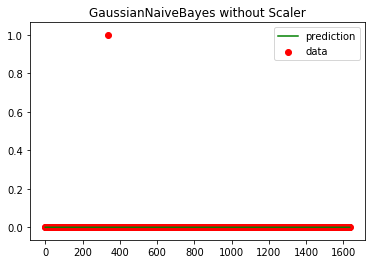

Confusion matrix, without normalization
[[1634    0]
 [   1    0]]

Accuracy:
0.999388379204893


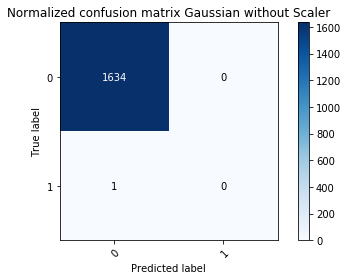

In [63]:
#Regular Gausian Naive Bayes

#Scatter Graphic
plot_scatter_graphic(Y_test,Y_pred_naive_bayes_Gaussian,"GaussianNaiveBayes without Scaler")

#Confusion matrix
plot_confusion_matrix(Y_test, Y_pred_naive_bayes_Gaussian , classes = unique_labels(Y_test, Y_pred_naive_bayes_Gaussian), normalize=False,
                      title='Normalized confusion matrix Gaussian without Scaler')

#Accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred_naive_bayes_Gaussian)
print("\nAccuracy:")
print(accuracy)

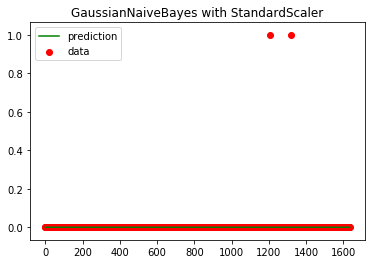

Confusion matrix, without normalization
[[1633    0]
 [   2    0]]

Accuracy:
0.998776758409786


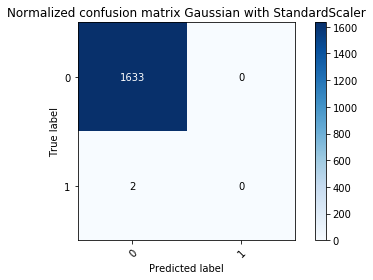

In [64]:
#Gausian Standar Scaler Naive Bayes

#Scatter Graphic
plot_scatter_graphic(Y_test_Standard,Y_pred_naive_bayes_Gaussian_Standard,"GaussianNaiveBayes with StandardScaler")

#Confusion matrix
plot_confusion_matrix(Y_test_Standard, Y_pred_naive_bayes_Gaussian_Standard , classes = unique_labels(Y_test_Standard, Y_pred_naive_bayes_Gaussian_Standard), normalize=False,
                      title='Normalized confusion matrix Gaussian with StandardScaler')

#Accuracy of the model
accuracy = accuracy_score(Y_test_Standard, Y_pred_naive_bayes_Gaussian_Standard)
print("\nAccuracy:")
print(accuracy)

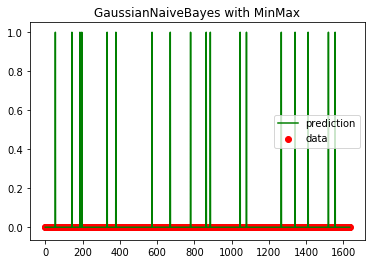

Confusion matrix, without normalization
[[1617   18]
 [   0    0]]

Accuracy:
0.9889908256880734


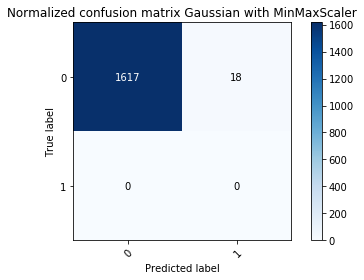

In [65]:
#Gausian MinMax Naive Bayes

#Scatter Graphic
plot_scatter_graphic(Y_test_MinMax,Y_pred_naive_bayes_Gaussian_MinMax,"GaussianNaiveBayes with MinMax")

#Confusion matrix
plot_confusion_matrix(Y_test_MinMax, Y_pred_naive_bayes_Gaussian_MinMax , classes = unique_labels(Y_test_MinMax, Y_pred_naive_bayes_Gaussian_MinMax), normalize=False,
                      title='Normalized confusion matrix Gaussian with MinMaxScaler')

#Accuracy of the model
accuracy = accuracy_score(Y_test_MinMax, Y_pred_naive_bayes_Gaussian_MinMax)
print("\nAccuracy:")
print(accuracy)

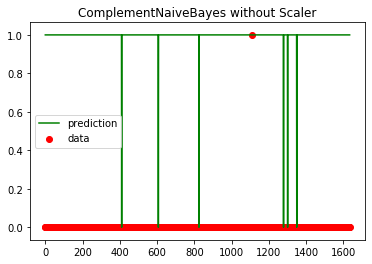

Confusion matrix, without normalization
[[   6 1628]
 [   0    1]]

Accuracy:
0.004281345565749235


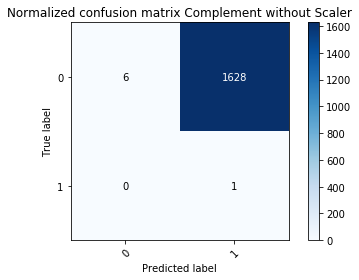

In [66]:
#Regular Complement Naive Bayes

#Scatter Graphic
plot_scatter_graphic(Y_test_Complement,Y_pred_naive_bayes_Complement,"ComplementNaiveBayes without Scaler")

#Confusion matrix
plot_confusion_matrix(Y_test_Complement, Y_pred_naive_bayes_Complement , classes = unique_labels(Y_test_Complement, Y_pred_naive_bayes_Complement), normalize=False,
                      title='Normalized confusion matrix Complement without Scaler')

#Accuracy of the model
accuracy = accuracy_score(Y_test_Complement, Y_pred_naive_bayes_Complement)
print("\nAccuracy:")
print(accuracy)

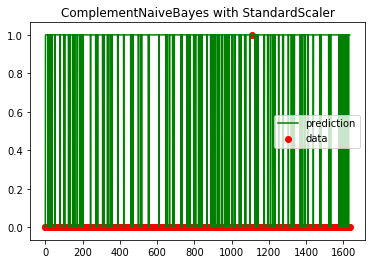

Confusion matrix, without normalization
[[ 128 1506]
 [   0    1]]

Accuracy:
0.07889908256880734


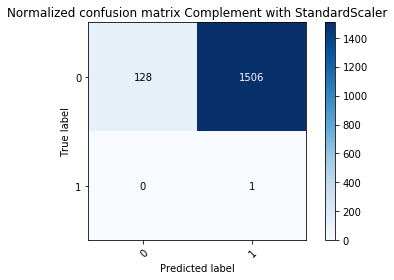

In [67]:
#Complement Standard Scaler Naive Bayes

#Scatter Graphic
plot_scatter_graphic(Y_test_Complement,Y_pred_naive_bayes_Complement_Standard,"ComplementNaiveBayes with StandardScaler")

#Confusion matrix
plot_confusion_matrix(Y_test_Complement_Standard, Y_pred_naive_bayes_Complement_Standard , classes = unique_labels(Y_test_Complement_Standard, Y_pred_naive_bayes_Complement_Standard), normalize=False,
                      title='Normalized confusion matrix Complement with StandardScaler')

#Accuracy of the model
accuracy = accuracy_score(Y_test_Complement, Y_pred_naive_bayes_Complement_Standard)
print("\nAccuracy:")
print(accuracy)

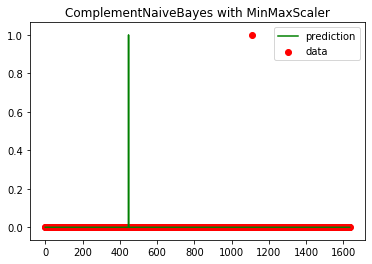

Confusion matrix, without normalization
[[1633    1]
 [   1    0]]

Accuracy:
0.998776758409786


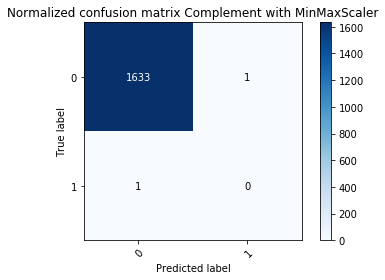

In [68]:
#Complement MinMax Naive Bayes

#Scatter Graphic
plot_scatter_graphic(Y_test_Complement,Y_pred_naive_bayes_Complement_MinMax,"ComplementNaiveBayes with MinMaxScaler")

#Confusion matrix
plot_confusion_matrix(Y_test_Complement_MinMax, Y_pred_naive_bayes_Complement_MinMax , classes = unique_labels(Y_test_Complement_MinMax, Y_pred_naive_bayes_Complement_MinMax), normalize=False,
                      title='Normalized confusion matrix Complement with MinMaxScaler')

#Accuracy of the model
accuracy = accuracy_score(Y_test_Complement_MinMax, Y_pred_naive_bayes_Complement_MinMax)
print("\nAccuracy:")
print(accuracy)

In [69]:
#HERE START DECISION TREE LEARNER
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

sqlCtx = SQLContext(sc)

#Convert the dataframe from pandas to sql
dfMondaysSQL = sqlCtx.createDataFrame(dfMondays)

In [70]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

#Merge selected columns into one
assembler = VectorAssembler(inputCols = featuredColumns, outputCol="features")
assembled = assembler.transform(dfMondaysSQL)

#Catch train and test data from chosen columns
(trainingData, testData) = assembled.randomSplit([1.0-ts,ts], seed=123123) 

trainingData.count(), testData.count()

(2435, 1651)

In [71]:
from pyspark.ml.classification import DecisionTreeClassifier

#Start decision tree clasificator
dt = DecisionTreeClassifier(labelCol="attack", featuresCol="features", maxDepth=10, minInstancesPerNode=100, impurity="gini")

In [72]:
from pyspark.ml import Pipeline

#Normalize data
pipeline = Pipeline(stages=[dt])
model = pipeline.fit(trainingData)

In [73]:
#Get predictions from the model

predictions = model.transform(testData)

In [74]:
from pyspark.sql.types import DoubleType

#Convert the attack column from int to double to prevent subsequent failure
predictions = predictions.withColumn("attack", predictions["attack"].cast("double"))
predictions = predictions.select("prediction","attack")

In [75]:
from pyspark.mllib.evaluation import MulticlassMetrics

metrics = MulticlassMetrics(predictions.rdd.map(tuple))

In [76]:
#Confusion matrix from the decision tree
metrics.confusionMatrix().toArray().transpose()

array([[1649.,    2.],
       [   0.,    0.]])

In [77]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Show success percentage of the model with the test data
evaluator = MulticlassClassificationEvaluator(labelCol="attack", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy:")
print(accuracy)

Accuracy:
0.9987886129618413


In [78]:
#HERE STARTS RANDOM FOREST
#catch training and test values from the dataset

#Same as regular Naive Bayes test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=ts)

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Confusion matrix, without normalization
[[1635]]

Accuracy:
1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


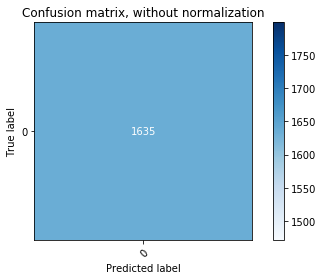

In [79]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create the model with 20 trees
model = RandomForestClassifier(n_estimators=20, 
                               bootstrap = True, verbose=2,
                               max_features = 'sqrt')
#Train the model
model.fit(X_train, Y_train.values.ravel())

#Get predictions from the model
predictions = model.predict(X_test)

#Confusion matrix
plot_confusion_matrix(Y_test,predictions,classes = unique_labels(Y_test, predictions))

#Accuracy of the model
accuracy = accuracy_score(Y_test, predictions)
print("\nAccuracy:")
print(accuracy)

In [80]:
from sklearn.ensemble import ExtraTreesClassifier

#Get relevance of each variable with ExtraTreesClassifier
model = ExtraTreesClassifier()

In [81]:
#Fit the model
model.fit(X_train,Y_train.values.ravel())

#List the relevance of each variable
list(model.feature_importances_)

[0.21793742984721845,
 0.2700331486997404,
 0.16882033003853789,
 0.12740712840073085,
 0.2158019630137724]

Confusion matrix, without normalization
[[1635]]

Accuracy:
1.0


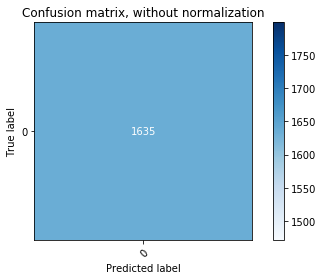

In [82]:
#Get predictions from the model
predictions = model.predict(X_test)

#Confusion matrix
plot_confusion_matrix(Y_test,predictions,classes = unique_labels(Y_test, predictions))

#Accuracy of the model
accuracy = accuracy_score(Y_test, predictions)
print("\nAccuracy:")
print(accuracy)

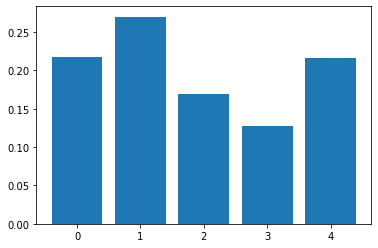

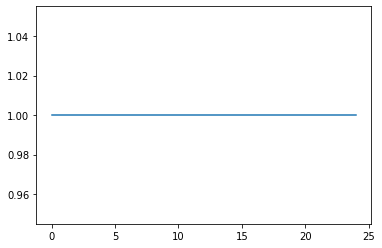

In [83]:
#Represent all variables and their relevance

pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

#show how much each built tree has contributed
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(X_train,Y_train.values.ravel())
    predictions=classifier.predict(X_test)
    accuracy[idx]=accuracy_score(Y_test, predictions)

plt.cla()
plt.plot(trees, accuracy)